In [1]:
import pandas as pd
import numpy as np

from glob import glob
from datetime import datetime

In [2]:
obdir = '/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/'

In [3]:
flist = glob(obdir + 'clean/*.pd')
for f in flist:
    print(f)

/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/CLN_1999_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/ALTA_1944_2020.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/AGD_2004_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/BCC_2004_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/SLB_1915_2020.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/PVC_2005_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/BSNFEX_2012_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/BSNFJE_2005_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/BSNFDC_2005_2019.pd


In [4]:
obs = []

for f in flist:
    site = f.split('/')[-1].split('_')[0]
    print('Aggregating %s'%site)
    
    df = pd.read_pickle(f)
    df['site'] = np.full(df.index.size, fill_value=site, dtype='U10')
    
    # We can put these back later 
    df = df.drop(columns=[k for k in df.keys() if ('auto' in k)|('depth' in k)])
    
    obs.append(df.set_index([df.index, 'site']).sort_index())

obs = pd.concat(obs, sort=True).sort_index()

# We can put these back later 
periods = pd.DataFrame(obs.pop('precip_periods'))
obs.insert(obs.shape[1], 'precip_periods', periods)

print('\n', obs.shape)
obs[-1020:-1000]

Aggregating CLN
Aggregating ALTA
Aggregating AGD
Aggregating BCC
Aggregating SLB
Aggregating PVC
Aggregating BSNFEX
Aggregating BSNFJE
Aggregating BSNFDC

 (85150, 11)


slr12       slr24    snow12_mm    snow24_mm  \
                    site                                                      
2019-04-03 11:00:00 ALTA          NaN   11.333333          NaN    86.360000   
2019-04-03 21:00:00 CLN           NaN         NaN     0.000000          NaN   
2019-04-04 09:00:00 AGD      1.000000    1.000000 -2514.600098 -2514.600098   
                    CLN           NaN         NaN     0.000000          NaN   
2019-04-04 11:00:00 ALTA          NaN         NaN          NaN     0.000000   
2019-04-04 21:00:00 CLN           NaN         NaN     0.000000          NaN   
2019-04-04 23:00:00 BCC      1.000000    1.000000 -2514.600098 -2514.600098   
2019-04-05 09:00:00 CLN           NaN         NaN     0.000000          NaN   
2019-04-05 10:00:00 AGD      1.000000    1.000000 -2514.600098 -2514.600098   
2019-04-05 11:00:00 ALTA          NaN         NaN          NaN     0.000000   
2019-04-05 21:00:00 AGD           NaN         NaN     0.000000     0.000000   
                    CLN      6.250000         NaN    25.400000          NaN   
2019-04-06 00:00:00 BCC   -762.000061 -762.000061 -2514.600098 -2514.600098   
2019-04-06 09:00:00 BCC  -1980.000122 -550.240723 -2514.600098 -2514.600098   
                    CLN           NaN         NaN     0.000000          NaN   
2019-04-06 11:00:00 ALTA          NaN         NaN          NaN     0.000000   
2019-04-06 21:00:00 CLN           NaN         NaN     0.000000          NaN   
2019-04-07 00:00:00 BCC      1.000000    1.000000 -2514.600098 -2514.600098   
2019-04-07 09:00:00 AGD      1.000000    1.000000 -2514.600098 -2514.600098   
                    CLN           NaN         NaN     0.000000          NaN   

                             swe12_mm     swe24_mm  tsfc_degC  tsfc_max_c  \
                    site                                                    
2019-04-03 11:00:00 ALTA          NaN     7.620000       1.11         NaN   
2019-04-03 21:00:00 CLN      0.000000          NaN        NaN        2.78   
2019-04-04 09:00:00 AGD  -2514.600098 -2514.600098        NaN         NaN   
                    CLN      0.000000          NaN        NaN        0.00   
2019-04-04 11:00:00 ALTA          NaN     0.000000       5.56         NaN   
2019-04-04 21:00:00 CLN      0.000000          NaN        NaN        3.89   
2019-04-04 23:00:00 BCC  -2514.600098 -2514.600098        NaN         NaN   
2019-04-05 09:00:00 CLN      0.000000          NaN        NaN        1.11   
2019-04-05 10:00:00 AGD  -2514.600098 -2514.600098        NaN         NaN   
2019-04-05 11:00:00 ALTA          NaN     0.000000       2.78         NaN   
2019-04-05 21:00:00 AGD      0.000000     0.000000        NaN         NaN   
                    CLN      4.064000          NaN        NaN        3.89   
2019-04-06 00:00:00 BCC      3.300000     3.300000        NaN         NaN   
2019-04-06 09:00:00 BCC      1.270000     4.570000        NaN         NaN   
                    CLN      0.000000          NaN        NaN       -1.11   
2019-04-06 11:00:00 ALTA          NaN     0.000000       0.56         NaN   
2019-04-06 21:00:00 CLN      0.000000          NaN        NaN        3.33   
2019-04-07 00:00:00 BCC  -2514.600098 -2514.600098        NaN         NaN   
2019-04-07 09:00:00 AGD  -2514.600098 -2514.600098        NaN         NaN   
                    CLN      0.000000          NaN        NaN       -0.56   

                          tsfc_max_degC  tsfc_min_degC  \
                    site                                 
2019-04-03 11:00:00 ALTA           2.78          -1.11   
2019-04-03 21:00:00 CLN             NaN            NaN   
2019-04-04 09:00:00 AGD           10.00          -1.67   
                    CLN             NaN            NaN   
2019-04-04 11:00:00 ALTA          11.67          -3.33   
2019-04-04 21:00:00 CLN             NaN            NaN   
2019-04-04 23:00:00 BCC            8.89          -1.11   
2019-04-05 09:00:00 CLN             NaN            NaN   
2019-04-05 10:00:0

In [5]:
obs.to_pickle(obdir + 'aggregate/WESTUS_ALL.uncut.pd')

In [37]:
# Note the ERA5 starts in 1980 - cut there
obs_cut = obs[(
    (obs.index.get_level_values(0) > datetime(1980, 1, 1, 0, 0))
    & ((obs['slr12'] > 1.) & (obs['slr12'] < 50.))
    & ((obs['slr24'] > 1.) & (obs['slr24'] < 50.))
)]

print(obs_cut.shape)
obs_cut[-1020:-1000]

(3685, 11)


slr12      slr24   snow12_mm   snow24_mm  \
                    site                                                 
2015-04-08 10:00:00 PVC   10.339212  10.339212   76.199997   76.199997   
2015-04-08 21:00:00 AGD    8.857142  12.382500   78.739998  198.119995   
2015-04-08 23:00:00 BCC   10.517598   9.090909   50.799999  127.000000   
                    PVC   13.655913  11.250000   38.099998  114.300003   
2015-04-11 23:00:00 AGD   49.803921  49.803921   25.400000   25.400000   
                    AGD    5.000000   5.000000   25.400000   25.400000   
2015-04-12 09:00:00 AGD    5.000000   5.000000   25.400000   25.400000   
2015-04-14 21:00:00 AGD   13.102262  13.102262  289.559998  289.559998   
2015-04-14 23:00:00 BCC   15.000001  15.000001  457.200012  457.200012   
                    PVC   16.655737  16.655737   50.799999   50.799999   
2015-04-15 09:00:00 AGD   15.582822  14.023044  304.799988  584.200012   
2015-04-15 10:00:00 AGD   15.582822  14.023044  304.799988  584.200012   
                    BCC   23.518517  15.000001  101.599998  457.200012   
2015-04-15 20:00:00 AGD   24.971910  17.145823   88.900002  396.239990   
2015-04-15 23:00:00 BCC   12.512315  19.242424   25.400000  127.000000   
2015-04-16 09:00:00 AGD    9.645570  15.750001   68.580002  160.020004   
2015-04-17 23:00:00 AGD   16.710526  16.710526   12.700000   12.700000   
2015-04-25 01:00:00 AGD    5.850084   5.850084   69.849998   69.849998   
2015-04-25 23:00:00 BCC    8.616011   8.616011   63.500000   63.500000   
2015-04-26 01:00:00 AGD    8.980654   8.980654  134.619995  134.619995   

                           swe12_mm   swe24_mm  tsfc_degC  tsfc_max_c  \
                    site                                                
2015-04-08 10:00:00 PVC    7.370000   7.370000        NaN         NaN   
2015-04-08 21:00:00 AGD    8.890000  16.000000        NaN         NaN   
2015-04-08 23:00:00 BCC    4.830000  13.970000        NaN         NaN   
                    PVC    2.790000  10.160000        NaN         NaN   
2015-04-11 23:00:00 AGD    0.510000   0.510000        NaN         NaN   
                    AGD    5.080000   5.080000        NaN         NaN   
2015-04-12 09:00:00 AGD    5.080000   5.080000        NaN         NaN   
2015-04-14 21:00:00 AGD   22.100000  22.100000        NaN         NaN   
2015-04-14 23:00:00 BCC   30.480000  30.480000        NaN         NaN   
                    PVC    3.050000   3.050000        NaN         NaN   
2015-04-15 09:00:00 AGD   19.559999  41.660000        NaN         NaN   
2015-04-15 10:00:00 AGD   19.559999  41.660000        NaN         NaN   
                    BCC    4.320000  30.480000        NaN         NaN   
2015-04-15 20:00:00 AGD    3.560000  23.110001        NaN         NaN   
2015-04-15 23:00:00 BCC    2.030000   6.600000        NaN         NaN   
2015-04-16 09:00:00 AGD    7.110000  10.160000        NaN         NaN   
2015-04-17 23:00:00 AGD    0.760000   0.760000        NaN         NaN   
2015-04-25 01:00:00 AGD   11.940000  11.940000        NaN         NaN   
2015-04-25 23:00:00 BCC    7.370000   7.370000        NaN         NaN   
2015-04-26 01:00:00 AGD   14.990000  14.990000        NaN         NaN   

                          tsfc_max_degC  tsfc_min_degC precip_periods  
                    site                                               
2015-04-08 10:00:00 PVC            3.89          -1.11             []  
2015-04-08 21:00:00 AGD           -3.89          -5.00             []  
2015-04-08 23:00:00 BCC           -2.78          -6.11             []  
                    PVC            0.56          -4.44             []  
2015-04-11 23:00:00 AGD            9.44          -2.22             []  
                    AGD            9.44          -2.22             []  
2015-04-12 09:00:00 AGD            7.78          -3.89             []  
2015-04-14 21:00:00 AGD           -3.33         -10.00             []  
2015-04-14 23:00:00 BCC            0.00          -7.22             []  
  

In [38]:
obs_cut.to_pickle(obdir + 'aggregate/WESTUS_ALL.pd')

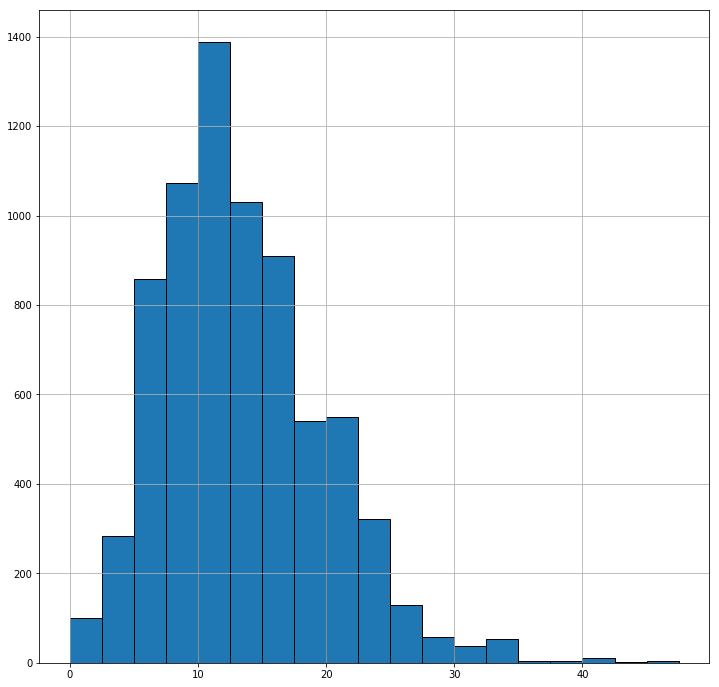

In [42]:
import matplotlib.pyplot as plt

slr = np.append(obs_cut['slr12'].dropna().values, obs_cut['slr24'].dropna().values)

plt.figure(facecolor='w', figsize=(12, 12))
plt.hist(slr, bins=np.arange(0, 50, 2.5), edgecolor='k')
plt.grid()